## Evaluating FAIRness of HydroShare models

C:\Users\AbnerBogan\AppData\Local\Temp\ipykernel_47008\1536552684.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="FAIR_Principle", y="Score", data=df_melted, inner="box", palette="pastel")


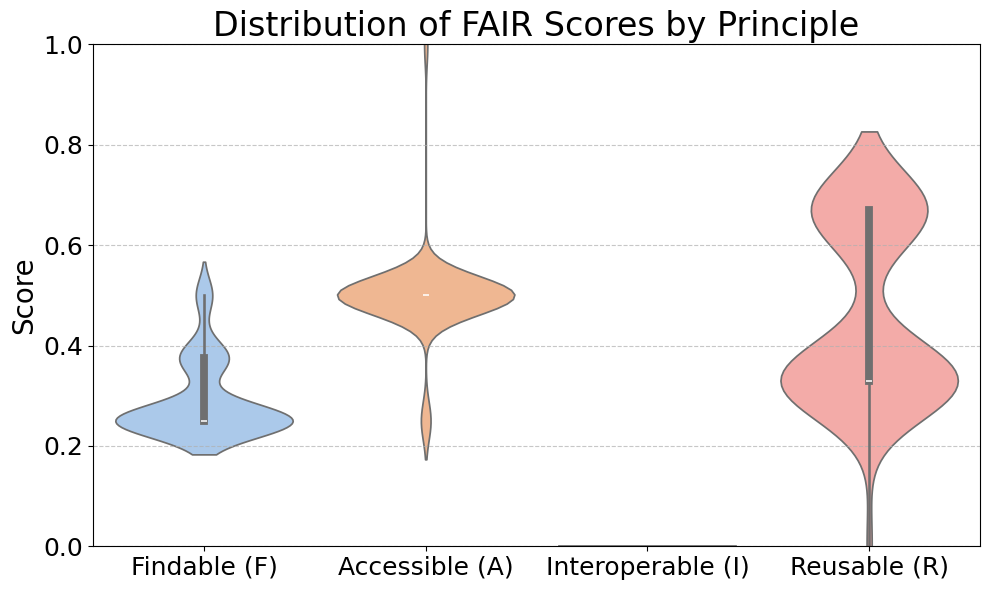

In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the directory containing output JSON files
output_dir = Path("out_hydroshare")

# Collect FAIR scores
records = []

# define fonts
font_title = 24
font_label = 20
font_ticks = 18

for file in output_dir.glob("*.json"):
    try:
        with open(file, 'r') as f:
            data = json.load(f)
            if not isinstance(data, dict) or not data:
                print(f"kipping empty or malformed JSON in {file.name}")
                continue
            model_name = list(data.keys())[0]
            model_data = data[model_name]
            scores = model_data.get("scores", {})
            if not scores:
                print(f"No 'scores' found in {file.name}")
                continue
            records.append({
                "model": model_name,
                "F": scores.get("F"),
                "F1": scores.get("F1"),
                "F2": scores.get("F2"),
                "F3": scores.get("F3"),
                "F4": scores.get("F4"),
                "A": scores.get("A"),
                "A1": scores.get("A1"),
                "A2": scores.get("A2"),
                "I": scores.get("I"),
                "I1": scores.get("I"),
                "I2": scores.get("I2"),
                "R": scores.get("R"),
                "R1": scores.get("R1"),
                "R2": scores.get("R2"),
                "R3": scores.get("R3")
            })
    except Exception as e:
        print(f"Error reading {file.name}: {e}")

# Guard against empty data
if not records:
    raise ValueError("No valid FAIR score records were found in the directory.")

# Convert to DataFrame
df = pd.DataFrame(records)

# Reshape DataFrame to long format for seaborn
df_melted = df.melt(id_vars="model", value_vars=["F", "A", "I", "R"],
                    var_name="FAIR_Principle", value_name="Score")

# Replace abbreviations with full names
df_melted["FAIR_Principle"] = df_melted["FAIR_Principle"].replace({
    "F": "Findable (F)",
    "A": "Accessible (A)",
    "I": "Interoperable (I)",
    "R": "Reusable (R)"
})

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x="FAIR_Principle", y="Score", data=df_melted, inner="box", palette="pastel")

plt.title("Distribution of FAIR Scores by Principle")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Set individual font sizes
plt.xlabel("", fontsize=font_label)
plt.ylabel(f"Score", fontsize=font_label)
plt.title("Distribution of FAIR Scores by Principle", fontsize=font_title)

# Tick labels
plt.xticks(fontsize=font_ticks)
plt.yticks(fontsize=font_ticks)

plt.tight_layout()
plt.show()
